## **Resnet Architecture**

### **History**
In 2010, Traning a neural network was a computationally expensive task. With introduction to Deep Convolutional Network in [AlexNet](https://papers.nips.cc/paper/4824-imagenet-classification-with-deep-convolutional-neural-networks.pdf) came techniques to reduce computation cost with efficient learning architectures. In AlexNet, a set of new concepts were introduced/utilized like **Convolution Operation, Pooling, Non-Saturating Activation function, Local Response Normalization, Dropout.** The network implementation has 5 Conv Layers, 3 Fully Connected layers i.e. 8 learning layers along with max pooling and dropout. With current standing of neural networks in 2020, AlexNet sounds like a baby architecture but with parameters close to 65M and 0.65M neurons. AlexNet manages to win all the major competition in the field of computer vision and reducing the test error are by a good margin. Then why Resnet then?

### **Challenges with Deep Networks**

* For building larger network, we add more layers to the architecture and its widely believed by stacking more layers the network learns better features for predictions.
* So by adding more layers, we are learning better features but? during backpropagation these learned parameters/gradients needs to pass through the same network and the gradients by the time it reaches your initial layers becomes so small that it vanishes, causing **Vanishing Gradient Problem.**
* Next major issue with large neural networks is the **Degradation Problem.** It means as the number of layers increases the training accuracy starts saturating and then degrading. Consider a neural network with 3 layers (Shallow network) which works good with 80% accuracy and as i mentioned in first point that stacking layers learns better features, i stack up by appending 3 more layers which only acts as identity mapping i.e. f(x) = x, f is my identity function, now instead of retaining the same performance, the network starts degarding. One way to look at this is that the network finds it difficult to f(x)=x and it would work better with f(x)=0 i.e. shallow network. In simple terms, **Degradation problem can be referred as inability to resolve the optimization for large network.**

### **Vanishing Gradient Problem**

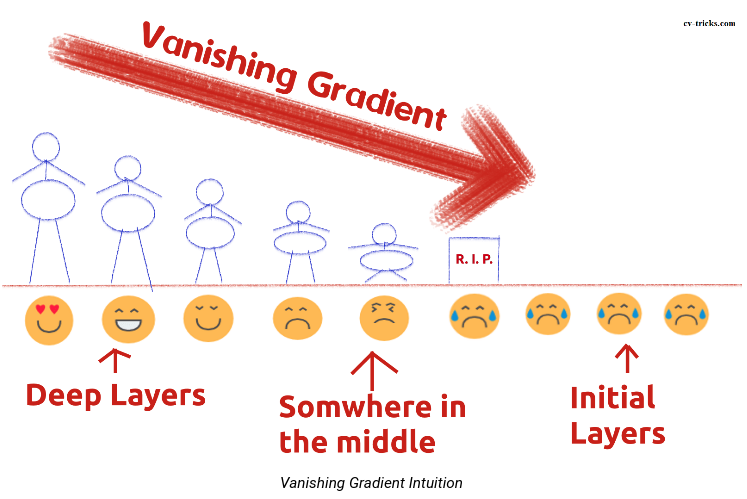

In [1]:
from IPython.display import Image
Image('VGP.png')

### **Resnet Breakthrough**
In 2015, Microsoft research team came up with Resnet, **It found that splitting a deep network into three layer chunks and passing the input into each chunk straight through to the next chunk, along with the residual-output of the chunk, helped eliminate much of this Vanishing Gradient Problem and Degradation Problem.** No extra parameters or changes to the learning algorithm were needed. ResNets yielded lower training error (and test error) than their shallower counterparts simply by reintroducing outputs from shallower layers in the network to compensate for the vanishing data. Note that **ResNets are an ensemble of relatively shallow nets and do not resolve the vanishing gradient problem by preserving gradient flow throughout the entire depth of the network – rather, they avoid the problem simply by constructing ensembles of many short networks together.**

On the ImageNet dataset, residual nets with a depth of up to 152 layers—8× deeper than VGG nets but still having lower complexity. An ensemble of these residual nets achieves 3.57% error on the ImageNet test set. This result won the 1st place on the ILSVRC 2015 classification task. We also present analysis on CIFAR-10 with 100 and 1000 layers.

### **Resnet Block**

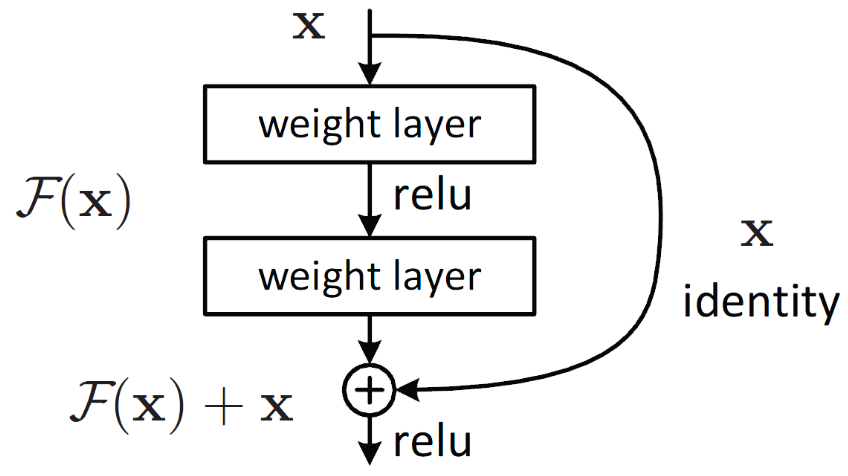

In [2]:
Image('resnet.png')

### **How Resnet Functions works?**

* Resnet Block's output is H(x), which is equal to F(x) + x. Assuming our objective function of Resnet Block is H(x).
* Author's Hypothesize is that, learning a function F(x) is simpler than H(x), H(x) a combination of input and output from two layered network.
* H(x) depends on F(x), which is the output of two layer network.
* F(x) is called as Residual Mapping and x is called as Identity Mapping / Skip Connections.

    **The authors hypothesize that the residual mapping (i.e. F(x)) may be easier to optimize than H(x). To illustrate with a simple example, assume that the ideal H(x)=x. Then for a direct mapping it would be difficult to learn an identity mapping as there is a stack of non-linear layers as follows.**
    
    **x → weight1 → ReLU → weight2 → ReLU... → x**

    **So, to approximate the identity mapping with all these weights and ReLUs in the middle would be difficult.**

    **Now, if we define the desired mapping H(x)=F(x)+x, then we just need get F(x)=0 as follows.**
    
    **x → weight1 → ReLU → weight2 → ReLU... → 0**

    **Achieving the above is easy. Just set any weight to zero and you will get a zero output. Add back x and you get your desired mapping.**

* Ultimately, we are trying to learn the parameters associated with F(x).

### **Backpropagation through Resnet**

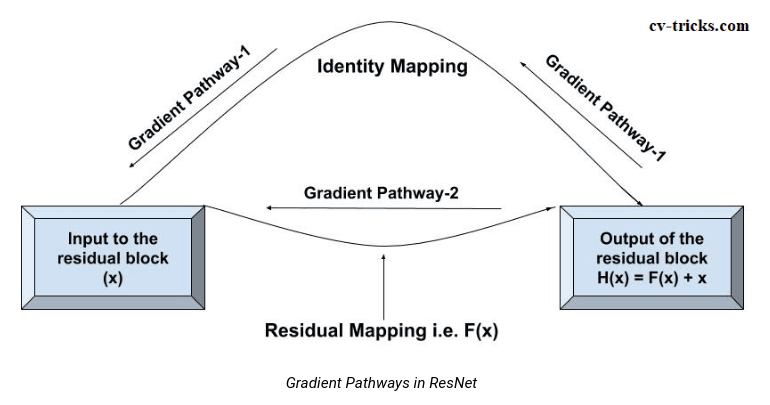

In [3]:
Image('bp_resnet.png')

### **What happens during Backpropagation**

* During Backpropagation, the gradients can flow through f(x) (residual mapping) or gets directly to x (identity mapping).
* If gradients passes through the residual mapping (gradient pathway 2), then it has to pass through the relu and conv layers. This Mapping can either make the value small or vanish the gradients.
* Here, Identity Mapping comes into the picture, it directly moves the gradient to inital layer skipping the residual mapping. Solving the Vanishing Gradient Problem.

### **Identity Mapping**
* Identity Mapping also known as Skip Connections, has been experimented widely by different element like Dropout, Conv1x1 or multiplying with constant factor etc. Checkout identity mapping paper.
* These experiments of skip connections shows varied results i.e. find in second image below.
* **Best result is obtained on plain mapping of x (identity shortcut) without any multiplicative manipulations like (scaling, gating, 1×1 convolutions, and dropout) on the shortcuts, because such shortcuts can hamper information propagation and lead to optimization problems.**
* It is noteworthy that the gating and 1×1 convolutional shortcuts introduce more parameters, and should have stronger representational abilities than identity shortcuts. In fact, the shortcut-only gating and 1×1 convolution cover the solution space of identity shortcuts (i.e., they could be optimized as identity shortcuts). However, their training error is higher than that of identity shortcuts, indicating that the degradation of these models is caused by **optimization issues, instead of representational abilities**, which is why **degradation problem existed** in the first place.

### **Experiments with Identity Mapping**

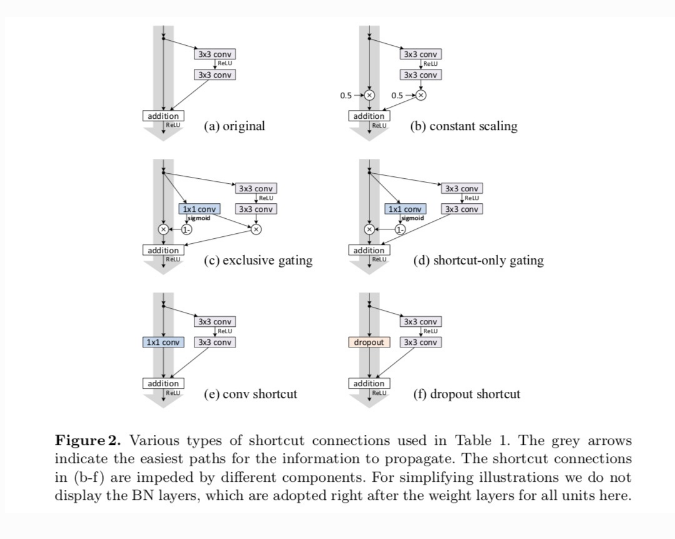

In [4]:
Image("identity Mapping.png")

### **Results of Identity Mapping**

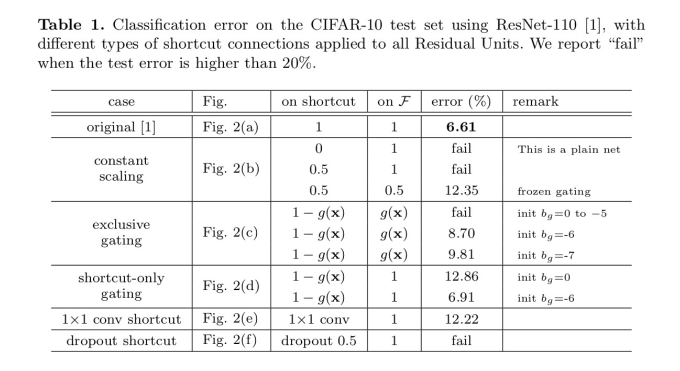

In [5]:
Image("result_identity_mapping.png")

### **Assumption about the Identity Mapping**
* No parameters are learned in identity mapping i.e. when dimension matches between F(x) and x.
* Since we are adding F(x) + x, the dimensions should match. If dimension don't match, we can follow below techniques to match the dimension.
    * Either we can pad zeros to dimension to match F(x) with x or viceversa
    * We can use the conv1x1 layer, reduce or increase the dimension. It introduces parameters and which it turn increases the time complexity.
    
### **In Conclusion**

* Resnet helps in building large neural networks, by ensembling short resnet blocks.
* Resnet solves Vanishing Gradient Problem by adding identity mapping.
* Resnet solves Degradation Problem by learning Residual Mapping F(x).

### **[Resnet34 Implementation Using Pytorch](https://github.com/pytorch/vision/blob/master/torchvision/models/resnet.py)**

### **Importing Pytorch Libraries**

In [6]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import transforms
import torchvision
import time

transform = transforms.Compose([transforms.ToTensor(),transforms.Normalize((0.5, 0.5, 0.5),(0.5, 0.5, 0.5))])
trainset = torchvision.datasets.CIFAR10(root='/home/mayur/Desktop/Pytorch/data', train=True,
                                        download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=32,
                                          shuffle=True, num_workers=2)

label_map = {0: 0, 2: 1}
class_names = ['airplane', 'bird']
cifar_2 = [(img, label_map[label1]) for img, label1 in trainset if label1 in [0,2]]
#cifar2_val = [(img, label_map[label]) for img, label in testset if label in [0, 2]]

trainloader = torch.utils.data.DataLoader(cifar_2, batch_size=64,shuffle=True)
#testloader = torch.utils.data.DataLoader(cifar2_val, batch_size=64,shuffle=False)

device = torch.device('cuda:0' if torch.cuda.is_available else 'cpu')

Files already downloaded and verified


In [7]:
def train(model, optimizer, loss_fn, trainloader, n_epochs, device):
    for epoch in range(1, n_epochs+1):
        training_loss = 0.0
        valid_loss = 0.0
        
        model.train()
        for batch in trainloader:
            img, label = batch
            img = img.to(device)
            label = label.to(device)
            
            output = model(img)
            #print(output.shape)
            optimizer.zero_grad()
            loss = loss_fn(output, label)
            loss.backward()
            optimizer.step()
            training_loss += loss.data.item()
        training_loss /= len(trainset)
        
        print(f'Epoch: {epoch}, Training Loss: {training_loss:.3f}')

### Conv1x1

* **The purpose of using Conv1x1 is to make the dimension match between mapping function F(x) and x or h(x) as mentioned in identity mapping paper. As given in referenced links, Conv1x1 helps to reduce or increase the number of feature maps i.e. which helps in dimension matching between resnet mapping and identity mapping.**

* 1x1 is the kernel size of the convolutional operation.

* **Conv1x1 is projection shortcut i.e. it comes into picture when F(x) and x dimension is differs. Otherwise, Identity Mapping is done without Conv1x1.**

* **Conv1x1 increases the time complexity, because of parameters to learn.


In [8]:
def conv1x1(in_planes, out_planes, stride=1):
    return nn.Conv2d(in_planes, out_planes, kernel_size=1, stride=stride, bias=False)

* conv3x3 is a simple convolution operation on feature maps and inputs (x).

In [9]:
def conv3x3(in_planes, out_planes, stride=1, padding=1):
     return nn.Conv2d(in_planes, out_planes, kernel_size=3, stride=stride, padding=padding)

### Resnet Block
* It contains 2 Conv with 1 Relu and 2 BatchNorm layer and downsample layer.
* The Network is simple to follow until it reaches to, downsample != None.
* Downsample: A sequential network with conv1x1 layer and batchNorm layer.(Think about Identity Mapping)
* The downsample layer is initialized, when feature map size is reduced to half (by stride=2) and it is compensated by increasing the number of filters by double. 
* Everytime the number of filters increases from 64 to 128 then 128 to 256 and so on, the dimension changes throughout that combo of block.
* When the number of filters are doubled, the downsample will make sure the identity x is also changed w.r.t to number of filters for match the dimension

In [10]:
class ResnetBlock(nn.Module):
    expansion = 1

    def __init__(self, inplanes, planes, stride=1, downsample=None, norm_layer=None):
        super().__init__()
        if norm_layer is None:
            norm_layer = nn.BatchNorm2d
        self.conv1 = conv3x3(inplanes, planes, stride)
        self.bn1 = norm_layer(planes)
        self.relu = nn.ReLU(inplace=True)
        self.conv2 = conv3x3(planes, planes)
        self.bn2 = norm_layer(planes)
        self.downsample = downsample
        self.stride = stride

    def forward(self, x):
        identity = x

        out = self.conv1(x)
        out = self.bn1(out)
        out = self.relu(out)

        out = self.conv2(out)
        out = self.bn2(out)

        if self.downsample is not None:
            identity = self.downsample(x)

        out += identity
        out = self.relu(out)

        return out

### **Keypoint**

* **Below Image is a sequential module with resnet block.**
* **It is the layer 2 of the resnet network.**
* **In Layer 2, Resnet block's input channel(feature map) is 64 and output channel is 128.**
* **Since Output channel is changed to 128 we need to change our identity mapping to meet the dimension of this output channel.**
* **After Residual Mapping is done as mentioned in paper F(x), we bring in conv1x1 through downsample layer.**
* **The downsample layer takes in input channel 64 but outputs channel 128 such that addition can takes as mentioned above **out+= Identity**.

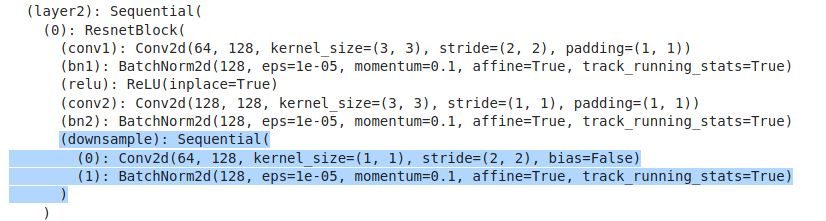

In [16]:
Image('downsample.png')

### **RESNET34**

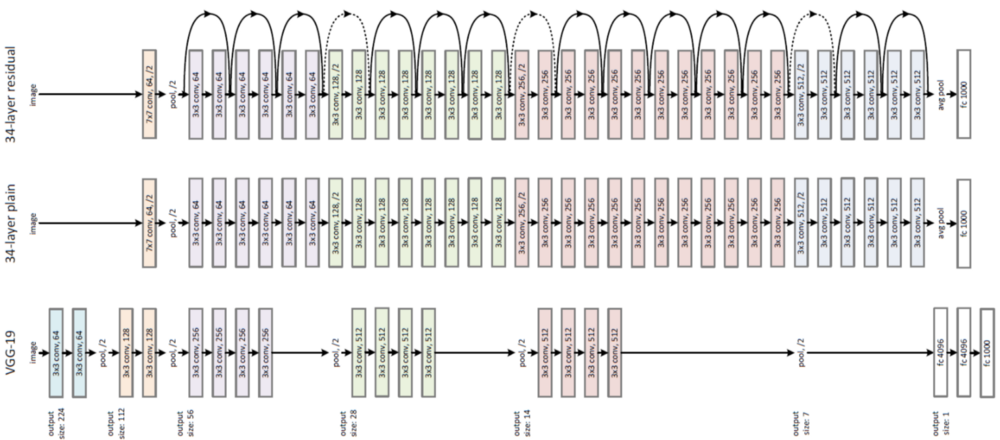

In [12]:
Image('resnet_architecture.png')

In [13]:
class ResNet(nn.Module):

    def __init__(self, block, layers, num_classes=1000,
                 norm_layer=None):
        super(ResNet, self).__init__()
        if norm_layer is None:
            norm_layer = nn.BatchNorm2d
        self._norm_layer = norm_layer
        self.inplanes = 64
    
        self.conv1 = nn.Conv2d(3, self.inplanes, kernel_size=7, stride=2, padding=3, bias=False)
        self.bn1 = norm_layer(self.inplanes)
        self.relu = nn.ReLU(inplace=True)
        self.maxpool = nn.MaxPool2d(kernel_size=3, stride=2, padding=1)
        self.layer1 = self._make_layer(block, 64, layers[0])
        self.layer2 = self._make_layer(block, 128, layers[1], stride=2)
        self.layer3 = self._make_layer(block, 256, layers[2], stride=2)
        self.layer4 = self._make_layer(block, 512, layers[3], stride=2)
        self.avgpool = nn.AdaptiveAvgPool2d((1, 1))
        self.fc = nn.Linear(512 * block.expansion, num_classes)

        # Weight Initialization of layers like conv, batchnorm and bias.
        for m in self.modules():
            if isinstance(m, nn.Conv2d):
                nn.init.kaiming_normal_(m.weight, mode='fan_out', nonlinearity='relu')
            elif isinstance(m, (nn.BatchNorm2d, nn.GroupNorm)):
                nn.init.constant_(m.weight, 1)
                nn.init.constant_(m.bias, 0)

    def _make_layer(self, block, planes, blocks, stride=1):
        norm_layer = self._norm_layer
        downsample = None
        if stride != 1 or self.inplanes != planes * block.expansion:
            downsample = nn.Sequential(conv1x1(self.inplanes, planes * block.expansion, stride), norm_layer(planes * block.expansion))

        layers = []
        layers.append(block(self.inplanes, planes, stride, downsample, norm_layer))
        self.inplanes = planes * block.expansion
        for _ in range(1, blocks):
            layers.append(block(self.inplanes, planes, norm_layer=norm_layer))

        return nn.Sequential(*layers)

    def _forward_impl(self, x):
        # See note [TorchScript super()]
        x = self.conv1(x)
        x = self.bn1(x)
        x = self.relu(x)
        x = self.maxpool(x)

        x = self.layer1(x)
        x = self.layer2(x)
        x = self.layer3(x)
        x = self.layer4(x)

        x = self.avgpool(x)
        x = torch.flatten(x, 1)
        x = self.fc(x)

        return x

    def forward(self, x):
        return self._forward_impl(x)

In [14]:
model = ResNet(ResnetBlock, [3, 4, 6, 3])

In [15]:
model

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): ResnetBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): ResnetBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel

In [70]:
start = time.time()
net = model
optimizer = optim.Adam(net.parameters(), lr=0.001)
net.to(device)
train(net, optimizer, torch.nn.CrossEntropyLoss(), trainloader, n_epochs=5, device=device)
end = time.time()
print(end-start)

Epoch: 1, Training Loss: 0.001
Epoch: 2, Training Loss: 0.001
Epoch: 3, Training Loss: 0.001
Epoch: 4, Training Loss: 0.001
Epoch: 5, Training Loss: 0.001
25.436043739318848


In [1]:
# numel_list = [p.numel() for p in model.parameters()]
# sum(numel_list), numel_list

### **Details of AlexNet**

* **AlexNet** - 5 Conv, Pooling, 3 FC and Dropout.

* **Dropout** - To reduce overfitting by dropping neurons randomly.The idea behind the dropout is similar to the model ensembles. Due to the dropout layer, different sets of neurons which are switched off, represent a different architecture and all these different architectures are trained in parallel with weight given to each subset and the summation of weights being one. For n neurons attached to DropOut, the number of subset architectures formed is 2^n. So it amounts to prediction being averaged over these ensembles of models. This provides a structured model regularization which helps in avoiding the over-fitting. Another view of DropOut being helpful is that since neurons are randomly chosen, they tend to avoid developing co-adaptations among themselves thereby enabling them to develop meaningful features, independent of others.

* **Relu** - Non-saturating nonlinearity, it helps in reducing the time taken to train the model. Better than Tanh and Sigmoid in terms of speed.The advantage of the ReLu over sigmoid is that it trains much faster than the latter because the derivative of sigmoid becomes very small in the saturating region and therefore the updates to the weights almost vanish. This is called vanishing gradient problem.

* **Convolution** - It assumes Stationarity of Statistics and Locality of Pixel Dependencies.
* **Parameters** - CNN has lesser parameters than FeedForward Neural Networks.
* **Local Response Normalization** - This layer is used after RELU, because the relu gives out unbounded activation and  we normalize the that.  If we normalize around the local neighborhood of the excited neuron, it becomes even more sensitive as compared to its neighbors. LRN exhibits Lateral Inhibition.
 **In neurobiology, there is a concept called “lateral inhibition”. Now what does that mean? This refers to the capacity of an excited neuron to subdue its neighbors. We basically want a significant peak so that we have a form of local maxima. This tends to create a contrast in that area, hence increasing the sensory perception. Increasing the sensory perception is a good thing! We want to have the same thing in our CNNs.**
 
* **Pooling** - It summarize the output of a neighbouring group of neuron in the same kernel map.

## **References**
   
   ****VGP**: https://en.wikipedia.org/wiki/Vanishing_gradient_problem
   
   ****VGP_Image:** https://cv-tricks.com/keras/understand-implement-resnets/
   
   ****Learning_F(X):** https://shuzhanfan.github.io/2018/11/ResNet/
   
   **Dilation:** https://erogol.com/dilated-convolution/
   
   **Receptive Field:** https://medium.com/mlreview/a-guide-to-receptive-field-arithmetic-for-convolutional-neural-networks-e0f514068807
   
   **Weight Initialization:** https://towardsdatascience.com/weight-initialization-in-neural-networks-a-journey-from-the-basics-to-kaiming-954fb9b47c79
   
   **Conv1x1:** https://machinelearningmastery.com/introduction-to-1x1-convolutions-to-reduce-the-complexity-of-convolutional-neural-networks/
   
   **LRN:** https://prateekvjoshi.com/2016/04/05/what-is-local-response-normalization-in-convolutional-neural-networks/
   
   **NeuralNetworks:** https://cv-tricks.com/cnn/understand-resnet-alexnet-vgg-inception/
   
   **Code:** https://github.com/pytorch/vision/blob/master/torchvision/models/resnet.py